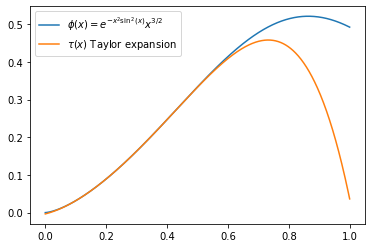

In [10]:
import numpy as np
from matplotlib import pyplot as plt

data1 = np.loadtxt('./02_phi.txt')
data2 = np.loadtxt('./02_tau.txt')

x = np.linspace(0, 1, 1001)

plt.plot(x,data1,label=r"$\phi(x) = e^{-x^2\sin^2(x)}x^{3/2}$")
plt.plot(x,data2,label=r"$\tau(x)$ Taylor expansion")
plt.legend()

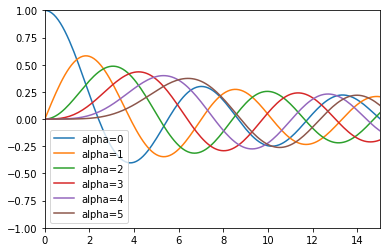

In [29]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('./03_bessel.txt')
data = data.reshape(6,202)
xx = np.linspace(0, 20, 201)

for i in range(6):
    plt.plot(xx,data[i][1:],label="alpha="+str(i))
plt.xlim(0,15)
plt.ylim(-1,1)
plt.legend()

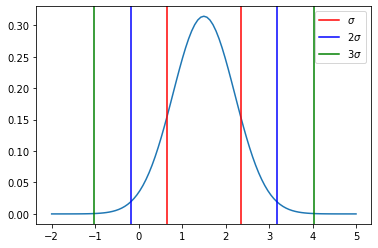

In [8]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('05_pdf.txt')
plt.plot(data[:, 0], data[:, 1])

mean = 1.5
sigma = 0.843462288
plt.axvline(mean+sigma, color='r', label=r"$\sigma$")
plt.axvline(mean-sigma, color='r')
plt.axvline(mean+2*sigma, color='b', label=r"$2\sigma$")
plt.axvline(mean-2*sigma, color='b')
plt.axvline(mean+3*sigma, color='g', label=r"$3\sigma$")
plt.axvline(mean-3*sigma, color='g')
plt.legend()

# Curve fitting: method of least squares

$$\Pi\equiv\sum_{i=1}^Nd_i^2=\sum_{i=1}^N(y_i-f(x_i))^2=minimum$$

## Linear least-square

$$\Pi\equiv\sum_{i=1}^Nd_i^2=\sum_{i=1}^N(y_i-(a+bx+i))^2$$

The best-fit coefficients a and b can be determined by minimizing $\Pi$:

$$\frac{\partial\Pi}{\partial a}=2\sum_{i=1}^N(y_i-(a+bx+i))=0$$

$$\frac{\partial\Pi}{\partial b}=2\sum_{i=1}^Nx_i(y_i-(a+bx+i))=0$$

$$\sum_{i=1}^Ny_i = a\sum_{i=1}^N1+b\sum_{i=1}^Nx_i$$

$$\sum_{i=1}^Nx_iy_i=a\sum_{i=1}^Nx_i+b\sum_{i=1}^Nx_i^2$$

$$a=\dfrac{(\sum_{i=1}^Ny_i)(\sum_{i=1}^Nx_i^2)-(\sum_{i=1}^Nx_i)(\sum_{i=1}^Nx_iy_i)}{N(\sum_{i=1}^Nx_i^2)-(\sum_{i=1}^Nx_i)^2}$$

$$b=\dfrac{N(\sum_{i=1}^Nx_iy_i)-(\sum_{i=1}^Nx_i)(\sum_{i=1}^Ny_i)}{N(\sum_{i=1}^Nx_i^2)-(\sum_{i=1}^Nx_i)^2}$$

## Quadratic least-squares

$$\Pi\equiv\sum_{i=1}^Nd_i^2=\sum_{i=1}^N(y_i-(a+bx_i+cx_i^2))^2=minimum$$

$$\frac{\partial\Pi}{\partial a}=\frac{\partial\Pi}{\partial b}=\frac{\partial\Pi}{\partial c}=0$$

$$\sum_{i=1}^Ny_i=a\sum_{i=1}^N1+b\sum_{i=1}^Nx_i+c\sum_{i=1}^Nx_i^2$$

$$\sum_{i=1}^Nx_iy_i = a\sum_{i=1}^Nx_i+b\sum_{i=1}^Nx_i^2+c\sum_{i=1}^Nx_i^3$$

$$\sum_{i=1}^Nx_i^2y_i=a\sum_{i=1}^Nx_i^2+b\sum_{i=1}^Nx_i^3+c\sum_{i=1}^Nx_i^4$$

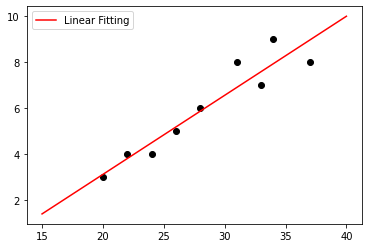

In [10]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('08_data.txt')
plt.scatter(data[:,0], data[:,1], color='k')

x = np.linspace(15, 40, 10)
y = x*0.344 - 3.759
plt.plot(x, y, color='r', label="Linear Fitting")
plt.legend()

# Numerical differentiation

Taylor series expansion of function $f(x)$:

$$f(x+\Delta x) = f(x)+f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2+\frac{f'''(x)}{3!}\Delta x^3+\cdots$$

where $\Delta x << x$.

## 1st-order derivative
### leap-frog (central difference) differentiation

Evaluating the Taylor expansion at $x+\Delta x$ and $x-\Delta x$ leads to:

$$f(x+\Delta x)\approx f(x)+f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2+\frac{f'''(x)}{3!}\Delta x^3$$

$$f(x-\Delta x)\approx f(x)-f'(x)\Delta x+\frac{f''(x)}{2!}\Delta x^2-\frac{f'''(x)}{3!}\Delta x^3$$

$$f(x+\Delta x)-f(x-\Delta x)\approx 2f'(x)\Delta x +2\frac{f'''(x)}{3!}\Delta x^3$$

$$f'(x)\approx \frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x}$$

### Euler forward differentiation

$$f'(x)\approx \frac{f(x+\Delta x)-f(x)}{\Delta x}$$

### Euler backward differentiation

$$f'(x)\approx \frac{f(x)-f(x)}{\Delta x}$$

## 2nd-order derivative

### three-point rule

$$f''(x)\approx \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{\Delta x^2}$$

### five-point rule

$$f''(x)\approx \frac{-f(x+2\Delta x)+16f(x+\Delta x)-30f(x)+16f(x-\Delta x)-f(x-2\Delta x)}{12\Delta x^2}$$

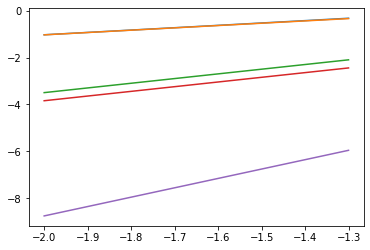

In [1]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('09_err.txt')
x = np.linspace(0.01, 0.05, 5)
for i in range(5):
    plt.plot(np.log10(x), np.log10(abs(data))[i])

# Numerical Integration

## Trapezoidal rule

$$\int_a^bf(x)d x\approx \sum_{k=0}^{N-1}hf(x_k)+\frac{1}{2}\sum_{k=0}^{N-1}h(f(x_{k+1})-f(x_k))\\
= \sum_{k=0}^{N-1}hf_k+\frac{1}{2}\sum_{k=0}^{N-1}h(f_{k+1}-f_k)\\
= \frac{h}{2}\sum_{k=0}^{N-1}(f_k+f_{k+1})=\frac{h}{2}(\sum_{k=1}^{N-1}(2f_k+f_0+f_k))$$

## Simpsom's rule

second-order polynomial ($P(x)=Ax^2+Bx+C$) treatment for the "slide edge" of trapezoidal

$$
\int_{x_i}^{x_{i+2}}P(x)d x = \frac{x_{i+2}-x_i}{3}(A(x_{i+2}^2+x_{i+2}x_i+x_i^2)+\frac{3}{2}B(x_{i+2}+x_i)+3C)\\
=\frac{x_{i+2}-x_i}{6}(P(x_i)+4P(\frac{x_i+x_{i+2}}{2})+P(x_{i+2}))\\
\int_{a}^{b}f(x)d x\approx \frac{h}{3}(f_0+\sum_{k=1}^{N-1}(2\delta_{(-1)^k,1}+4\delta_{(-1)^k,-1})f_k+f_N)
$$

# Matrix operations

## transposition:
$$A=
\begin{pmatrix}
    a_{11} & a_{12} & \cdots & a_{1N}\\
    a_{21} & a_{22} & \cdots & a_{2N}\\
    \cdots & \cdots & \cdots & \cdots\\
    a_{N1} & a_{N2} & \cdots & a_{NN}\\
\end{pmatrix},A^T=
\begin{pmatrix}
    a_{11} & a_{21} & \cdots & a_{N1}\\
    a_{12} & a_{22} & \cdots & a_{N2}\\
    \cdots & \cdots & \cdots & \cdots\\
    a_{1N} & a_{2N} & \cdots & a_{NN}\\
\end{pmatrix}
$$

## multiplication:
$$
C=
\begin{pmatrix}
    a_{11} & a_{12} & \cdots & a_{1N}\\
    a_{21} & a_{22} & \cdots & a_{2N}\\
    \cdots & \cdots & \cdots & \cdots\\
    a_{N1} & a_{N2} & \cdots & a_{NN}\\
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12} & \cdots & b_{1N}\\
    b_{21} & b_{22} & \cdots & b_{2N}\\
    \cdots & \cdots & \cdots & \cdots\\
    b_{N1} & b_{N2} & \cdots & b_{NN}\\
\end{pmatrix}
, c_{jk}=\sum_{l=1}^N a_{jl}b_{lk}\\
$$

$$
\begin{pmatrix}
    a_{11} & a_{12} & \cdots & a_{1N}\\
    a_{21} & a_{22} & \cdots & a_{2N}\\
    \cdots & \cdots & \cdots & \cdots\\
    a_{N1} & a_{N2} & \cdots & a_{NN}\\
\end{pmatrix}
\begin{pmatrix}
    x_{1}\\
    x_{2}\\
    cdots\\
    x_{N}\\
\end{pmatrix}=
\begin{pmatrix}
    y_{1}\\
    y_{2}\\
    cdots\\
    y_{N}\\
\end{pmatrix}, y_i=\sum_{j=1}^N a_{ij}x_j
$$

## Jacobi interative method
For linear equation with form $Ax=b$,

$$
b_i=\sum_{j=1}^N a_{ij}x_j=a_{ii}x_i+\sum_{j=1,j\neq i}^N a_{ij}x_j\\
x_i = \frac{1}{a_ii}(b_i-\sum_{j=1,j\neq i}^N a_{ij}x_j)
$$

# Finding roots

## Bisection method (brute force method)
cuts the interval in half in which the root lies, until the difference between two $x$ is less than a prescribed torlerance.

## Newton's method
Here one starts from a given initial guess value, $x_0$, for the root.
A refined value for the guess value, $x_1$, is computed based on the x-intercept of the line tangent to f at $x_0$
$$
(f(x_1)-f(x_0)=f'(x_0)(x_1-x_0))
$$
Constructing $f(x_1)=0$,
$$
x_1 = x_0-\frac{f(x_0)}{f'(x_0)}
$$
his process is repeated according to the scheme:
$$
x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}
$$
until the difference between two $x$ is less than a prescribed torlerance.

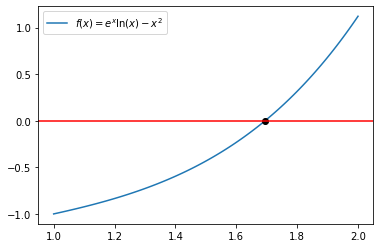

In [17]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(1,2,100)
y = np.exp(x)*np.log(x)-x**2

plt.plot(x,y,label=r"$f(x)=e^x\ln(x)-x^2$")
plt.plot(1.69460094,0,'ok')
plt.axhline(0,color='red')
plt.legend()

# Solving ordinary differential equations

## Euler method
$$y(x+h)=y(x)+hf(x,y(x))$$
$$y(x_{n+1})=y(x_n)+hf(x_n,y(x_n))=y(x_n)+k_1$$

## Midpoint method
$$y(x_{n+1})=y(x_n)+k_2$$
$$k_2=hf(x_n+\dfrac{h}{2},y(x_n)+\dfrac{k_1}{2})$$

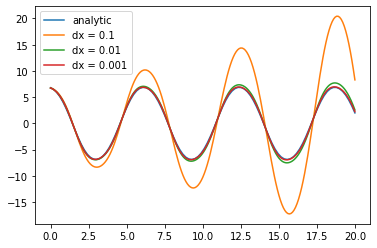

In [5]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 20, 100)
y = -0.2*np.cos(x)*np.cos(2*x)-np.sin(x)+7*np.cos(x)
plt.plot(x,y,label="analytic")

data_01 = np.loadtxt('12_ode_01.txt')
plt.plot(data_01[:,0], data_01[:,1], label='dx = 0.1')

data_02 = np.loadtxt('12_ode_001.txt')
plt.plot(data_02[:,0], data_02[:,1], label='dx = 0.01')

data_03 = np.loadtxt('12_ode_0001.txt')
plt.plot(data_03[:,0], data_03[:,1], label='dx = 0.001')

plt.legend()

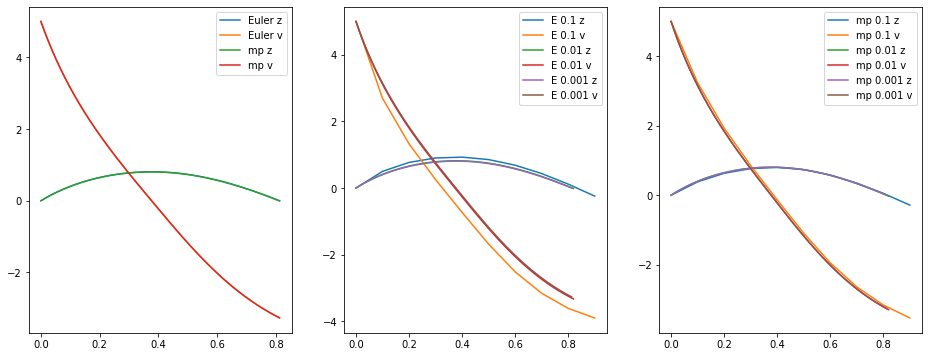

In [4]:
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16,6))
ax = fig.subplots(1,3)

data_01 = np.loadtxt('13_Euler_0001.txt')
ax[0].plot(data_01[:,0], data_01[:,1], label='Euler z')
ax[0].plot(data_01[:,0], data_01[:,2], label='Euler v')

data_02 = np.loadtxt('13_mp_0001.txt')
ax[0].plot(data_02[:,0], data_02[:,1], label='mp z')
ax[0].plot(data_02[:,0], data_02[:,2], label='mp v')

ax[0].legend()

data_01 = np.loadtxt('13_Euler_01.txt')
ax[1].plot(data_01[:,0], data_01[:,1], label='E 0.1 z')
ax[1].plot(data_01[:,0], data_01[:,2], label='E 0.1 v')

data_02 = np.loadtxt('13_Euler_001.txt')
ax[1].plot(data_02[:,0], data_02[:,1], label='E 0.01 z')
ax[1].plot(data_02[:,0], data_02[:,2], label='E 0.01 v')

data_03 = np.loadtxt('13_Euler_0001.txt')
ax[1].plot(data_03[:,0], data_03[:,1], label='E 0.001 z')
ax[1].plot(data_03[:,0], data_03[:,2], label='E 0.001 v')

ax[1].legend()


data_01 = np.loadtxt('13_mp_01.txt')
ax[2].plot(data_01[:,0], data_01[:,1], label='mp 0.1 z')
ax[2].plot(data_01[:,0], data_01[:,2], label='mp 0.1 v')

data_02 = np.loadtxt('13_mp_001.txt')
ax[2].plot(data_02[:,0], data_02[:,1], label='mp 0.01 z')
ax[2].plot(data_02[:,0], data_02[:,2], label='mp 0.01 v')

data_03 = np.loadtxt('13_mp_0001.txt')
ax[2].plot(data_03[:,0], data_03[:,1], label='mp 0.001 z')
ax[2].plot(data_03[:,0], data_03[:,2], label='mp 0.001 v')

ax[2].legend()